# Gallatin County parcel assessment analyzer

Code to analyze dataset produced from Montana Cadastral data by gc-parcel-assessment-parser.

In [318]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Display set-up
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
matplotlib.style.use('ggplot')

# Changing default plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [319]:
# Read in .csv produced by gc-parcel-assessment-parser
df = pd.read_csv('gc-parcels-complete.csv', dtype={'parcelid':str})

In [321]:
# Preview data
print df.columns
df.head(3)

Index([u'Unnamed: 0', u'parcelid', u'2015PropID', u'assessment', u'subdivisio', u'addresslin', u'addressl_1', u'citystatez', u'propaccess', u'levydistri', u'proptype', u'SizeAcres', u'2015BldVal', u'2015LndVal', u'2015TotVal', u'ownername', u'owneraddre', u'owneradd_1', u'owneradd_2', u'ownercity', u'ownerstate', u'ownerzipco', u'careoftaxp', u'shape_area', u'2014PropID', u'2014Acres', u'2014BldVal', u'2014LndVal', u'2014TotVal', u'ownername_unaltered', u'PropCat', u'inbzn', u'inncod', u'TotChange', u'LndChange', u'BldChange', u'TotPerCh', u'LndPerCh', u'BldPerCh', u'TotValPSF', u'LndValPSF', u'BldValPSF'], dtype='object')


,Unnamed: 0,parcelid,2015PropID,assessment,subdivisio,addresslin,addressl_1,citystatez,propaccess,levydistri,...,inncod,TotChange,LndChange,BldChange,TotPerCh,LndPerCh,BldPerCh,TotValPSF,LndValPSF,BldValPSF
0,0,06079817214070000,1528907,00RGG66579,WOODLAND PARK SUB PH 2,HATFIELD CT,NaN,"BOZEMAN, MT 59715",NaN,06-235041-7R 41,...,False,nan,nan,nan,nan,nan,nan,8.58,8.58,nan
1,1,06079817214110000,1528909,00RGG66581,WOODLAND PARK SUB PH 2,139 GRANITE PEAK DR,NaN,"BOZEMAN, MT 59715",NaN,06-235041-7R 41,...,False,nan,nan,nan,nan,nan,nan,8.69,8.69,nan
2,2,06079817214010000,1528904,00RGG66576,WOODLAND PARK SUB PH 2,HATFIELD CT,NaN,"BOZEMAN, MT 59715",NaN,06-235041-7R 41,...,False,nan,nan,nan,nan,nan,nan,8.85,8.85,nan


In [265]:
# QUESTION: What do the trends look like with parcels grouped by property type?

# There's some messyness here — Area_Change column total implies the county has shrunk by 500 acres
# Probably b/c the merge function methodology used means the data here looks back at what 2015 parcels 
# looked like in 2014.
# Doesn't account well for subdivision, potential changes to parcel IDs/geocodes

# Take-away: This analysis really doesn't make sense. The way I have the analysis set up allows for comparison 
# of trends for individual parcels, but not aggregate figures. It also allows summary statistics for 2015 data, I think.

# Might be possible to do a better analysis here working on df2014 and df2015 directly


dfByType = df.groupby('PropCat').agg({'parcelid': 'count',
                                       'SizeAcres': 'sum',
                                       '2015TotVal': 'sum', 
                                      })
dfByType = dfByType.rename(columns={'SizeAcres': '2015Acres',
                                    'parcelid': 'NumProps'
                                   })
dfByType['PerByValue'] = dfByType.apply(lambda x: x['2015TotVal'] / dfByType['2015TotVal'].sum(), axis=1)
dfByType['PerByArea'] = dfByType.apply(lambda x: x['2015Acres'] / dfByType['2015Acres'].sum(), axis=1)

print 'OVERALL GALLATIN COUNTY'
print dfByType[['NumProps','2015TotVal','PerByValue','2015Acres','PerByArea']].sort('NumProps', ascending=False)

# Specific to Bozeman

dfBznByType = df[df['inbzn'] == True].groupby('PropCat').agg({'parcelid': 'count',
                                       'SizeAcres': 'sum',
                                       '2015TotVal': 'sum' 
                                      })
dfBznByType = dfBznByType.rename(columns={'SizeAcres': '2015Acres',
                                    'parcelid': 'NumProps'
                                   })
dfBznByType['PerByValue'] = dfBznByType.apply(lambda x: x['2015TotVal'] / dfBznByType['2015TotVal'].sum(), axis=1)
dfBznByType['PerByArea'] = dfBznByType.apply(lambda x: x['2015Acres'] / dfBznByType['2015Acres'].sum(), axis=1)

print '\nINSIDE BOZEMAN CITY LIMITS'
print dfBznByType[['NumProps','2015TotVal','PerByValue','2015Acres','PerByArea']].sort('NumProps', ascending=False)

OVERALL GALLATIN COUNTY
               NumProps       2015TotVal  PerByValue  2015Acres  PerByArea
PropCat                                                                   
Residential       26539 8,611,983,277.00        0.63  73,360.47       0.04
Vacant             7281   661,331,002.00        0.05  51,474.70       0.03
Agricultural       4819   583,573,985.00        0.04 720,274.02       0.44
Commercial         3375 2,854,243,884.00        0.21  10,748.92       0.01
Tax-exempt         2785   658,047,488.00        0.05 788,616.93       0.48
Other/No Data      1005   165,627,792.00        0.01   4,669.55       0.00
Mixed-use           161   100,390,379.00        0.01   1,183.44       0.00
Industrial           48    70,743,947.00        0.01   2,627.35       0.00

INSIDE BOZEMAN CITY LIMITS
               NumProps       2015TotVal  PerByValue  2015Acres  PerByArea
PropCat                                                                   
Residential        8759 2,719,770,849.00        

In [266]:
# County- & Bozeman-wide total values

# Probably makes more sense to look at official Department of Revenue figures than these totals, 
# since there's pretty clearly some imprecision in the data

print 'COUNTYWIDE TOTALS'
print 'Total land categorized here:', df['SizeAcres'].sum()
print '2008 assessment:', df['2014TotVal'].sum()
print '2014 assessment:', df['2015TotVal'].sum()
print 'Change:', df['2015TotVal'].sum() - df['2014TotVal'].sum()
print '% change:', (df['2015TotVal'].sum() - df['2014TotVal'].sum()) / df['2014TotVal'].sum()

print '\nBOZEMAN TOTALS'
print 'Total land categorized here:', df[df['inbzn'] == True]['SizeAcres'].sum()
print '2008 assessment:', df[df['inbzn'] == True]['2014TotVal'].sum()
print '2014 assessment:', df[df['inbzn'] == True]['2015TotVal'].sum()
print 'Change:', df[df['inbzn'] == True]['2015TotVal'].sum() - df[df['inbzn'] == True]['2014TotVal'].sum()
print '% change:', (df[df['inbzn'] == True]['2015TotVal'].sum() - df[df['inbzn'] == True]['2014TotVal'].sum()) / df[df['inbzn'] == True]['2014TotVal'].sum()


COUNTYWIDE TOTALS
Total land categorized here: 1652955.371
2008 assessment: 15319781722.0
2014 assessment: 13705941754.0
Change: -1613839968.0
% change: -0.10534353539

BOZEMAN TOTALS
Total land categorized here: 10496.363
2008 assessment: 5362689689.0
2014 assessment: 5125862576.0
Change: -236827113.0
% change: -0.0441620020427


In [267]:
# Who owns tax-exempt property?
# Outputs list of top owners by acres owned

dfExempt = df[df['PropCat'] == 'Tax-exempt']
dfExemptGp = dfExempt.groupby('ownername').agg({'ownername': 'count',
                                      'SizeAcres': 'sum',
                                      '2015TotVal': 'sum'})
dfExemptGp = dfExemptGp.rename(columns={'ownername': 'Number'
                                   })
print '\nTOP 10 EXEMPT PROPERTY OWNERS BY VALUE'
print dfExemptGp.sort('2015TotVal', ascending=False).head(10)
print '\nTOP 10 EXEMPT PROPERTY OWNERS BY ACERAGE'
print dfExemptGp.sort('SizeAcres', ascending=False).head(10)


TOP 10 EXEMPT PROPERTY OWNERS BY VALUE
                                      2015TotVal  Number  SizeAcres
ownername                                                          
UNITED STATES OF AMERICA          133,757,151.00    1587 723,873.57
CITY OF BOZEMAN                    56,075,204.00     128   3,867.01
BOZEMAN SCHOOL DISTRICT            46,215,716.00      28     271.54
MONTANA STATE UNIVERSITY           38,905,424.00      27   2,254.18
STATE OF MONTANA                   33,686,874.00     200  51,942.86
BOZEMAN DEACONESS HEALTH SERVICES  30,790,860.00       5      16.36
GALLATIN COUNTY                    29,964,433.00      64   1,261.97
TOWN OF WEST YELLOWSTONE           21,433,783.00      16      63.27
BELGRADE SCHOOL DIST 44            12,898,589.00       5     181.49
BOZEMAN ELEMENTARY DISTRICT NO 7    7,726,958.00       3      28.99

TOP 10 EXEMPT PROPERTY OWNERS BY ACERAGE
                                            2015TotVal  Number  SizeAcres
ownername                   

In [268]:
# Who owns the most taxable property?

dfByOwner = df[df['PropCat'] != 'Tax-exempt'].groupby('ownername').agg({'ownername': 'count',
                                      'SizeAcres': 'sum',
                                      '2015TotVal': 'sum'})
dfByOwner = dfByOwner.rename(columns={'ownername': 'Number'
                                   })
print '\nTOP 10 NON-EXEMPT PROPERTY OWNERS BY VALUE'
print dfByOwner.sort('2015TotVal', ascending=False).head(10)
print '\nTOP 10 NON-EXEMPT PROPERTY OWNERS BY SIZE'
print dfByOwner.sort('SizeAcres', ascending=False).head(10)


TOP 10 NON-EXEMPT PROPERTY OWNERS BY VALUE
                                         2015TotVal  Number  SizeAcres
ownername                                                             
BOZEMAN DEACONESS HEALTH SERVICES     79,804,550.00      46     548.50
BLACK BULL OWNER LLC                  36,077,688.00     158     350.95
WORLDMARK THE CLUB                    28,033,549.00       1       7.81
FIRST SECURITY BANK                   27,739,443.00      14      16.82
ZOOT PROPERTIES LLC                   25,246,106.00      10      32.44
CH SP ACQUISITION LLC                 22,633,776.00      38   1,754.17
STONE RIDGE PARTNERS LLC              22,077,338.00       5      17.59
WHITEFISH L P                         21,940,738.00      15      65.52
SNH/LTA PROPERTIES TRUST              21,295,098.00       1       7.32
MITCHELL DEVELOPMENT & INVESTMENT LLC 20,912,695.00      21      42.95

TOP 10 NON-EXEMPT PROPERTY OWNERS BY SIZE
                                      2015TotVal  Number  Siz

In [269]:
# What are the most valuable properties in the county?

briefColList = ['parcelid','addresslin','PropCat','ownername','SizeAcres','2015TotVal','TotValPSF']

print 'MOST VALUABLE OVERALL'
print df.sort('2015TotVal', ascending=False)[briefColList].head(5)
print '\n'
print 'MOST VALUABLE PER SQUARE FOOT'
print df.sort('TotValPSF', ascending=False)[briefColList].head(5)
print '\n'
print 'LARGEST'
print df.sort('SizeAcres', ascending=False)[briefColList].head(5)


MOST VALUABLE OVERALL
                parcelid               addresslin     PropCat  \
44166  06079917201010000        915 HIGHLAND BLVD  Commercial   
44164  06079918130300000       1201 HIGHLAND BLVD  Tax-exempt   
38424  06006234370660000        110 GRAY WOLF AVE  Commercial   
12789  06079711207130000  555 ZOOT ENTERPRISES LN  Commercial   
24584  06079802222050000                      NaN  Commercial   

                               ownername  SizeAcres    2015TotVal  TotValPSF  
44166  BOZEMAN DEACONESS HEALTH SERVICES      34.43 73,385,122.00      48.93  
44164  BOZEMAN DEACONESS HEALTH SERVICES       7.03 29,940,150.00      97.77  
38424                 WORLDMARK THE CLUB       7.81 28,033,549.00      82.38  
12789                ZOOT PROPERTIES LLC      11.43 23,092,700.00      46.38  
24584           SNH/LTA PROPERTIES TRUST       7.32 21,295,098.00      66.77  


MOST VALUABLE PER SQUARE FOOT
                parcelid      addresslin     PropCat              ownername  \
11

In [270]:
# Who owns the most property, exempt or not?

dfByOwner = df.groupby('ownername').agg({'ownername': 'count',
                                      'SizeAcres': 'sum',
                                      '2015TotVal': 'sum'})
dfByOwner = dfByOwner.rename(columns={'ownername': 'Number'
                                   })
print '\nTOP 30 PROPERTY OWNERS BY VALUE'
print dfByOwner.sort('2015TotVal', ascending=False).head(30)
print '\nTOP 30 PROPERTY OWNERS BY SIZE'
print dfByOwner.sort('SizeAcres', ascending=False).head(30)


TOP 30 PROPERTY OWNERS BY VALUE
                                                  2015TotVal  Number  \
ownername                                                              
UNITED STATES OF AMERICA                      133,790,789.00    1589   
BOZEMAN DEACONESS HEALTH SERVICES             110,595,410.00      51   
CITY OF BOZEMAN                                56,243,938.00     130   
BOZEMAN SCHOOL DISTRICT                        46,215,716.00      28   
MONTANA STATE UNIVERSITY                       39,205,424.00      28   
STATE OF MONTANA                               36,321,293.00     279   
BLACK BULL OWNER LLC                           36,077,688.00     158   
GALLATIN COUNTY                                30,035,253.00      65   
WORLDMARK THE CLUB                             28,033,549.00       1   
FIRST SECURITY BANK                            27,739,443.00      14   
ZOOT PROPERTIES LLC                            25,246,106.00      10   
CH SP ACQUISITION LLC          

In [271]:
dfByOwner.sort('2015TotVal', ascending=False).head(30).to_csv('gc-parcels-30-by-value.csv')
dfByOwner.sort('SizeAcres', ascending=False).head(30).to_csv('gc-parcels-30-by-size.csv')

In [273]:
# Categories for next several analyses — residential property broken down by location
county = df[df['PropCat'] == 'Residential'][df['inbzn'] == False]
city_nonhist = df[df['PropCat'] == 'Residential'][(df['inbzn'] == True) & (df['inncod'] == False)]
city_historic = df[df['PropCat'] == 'Residential'][df['inncod'] == True]

# array for plotting m=1 slope lines
line = range(0,1000000)

(0, 2)

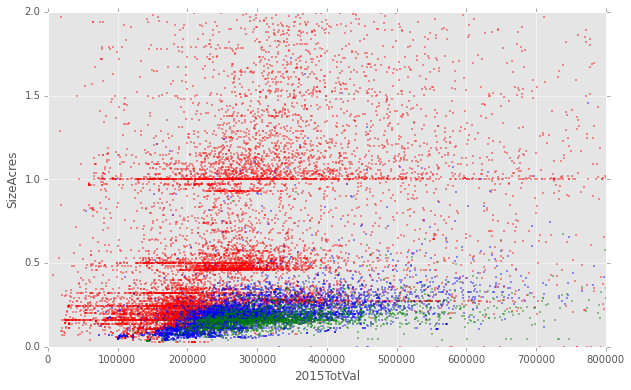

In [274]:
# Scatterplot of property value versus lot size (residential property)

ax = county.plot(kind='scatter', x='2015TotVal', y='SizeAcres',
        alpha=0.75, s=1, color='Red')
city_nonhist.plot(kind='scatter', x='2015TotVal', y='SizeAcres',
        alpha=0.75, s=1, color='Blue', ax=ax)
city_historic.plot(kind='scatter', x='2015TotVal', y='SizeAcres',
        alpha=0.75, s=1, color='Green', ax=ax)

ax.set_xlim([0,800000])
ax.set_ylim([0,2])

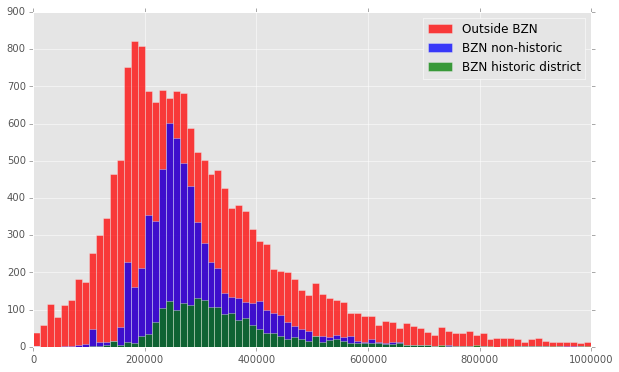

In [315]:
# Property value distribution

plotVar = '2015TotVal'

county[plotVar].hist(bins=80, color='Red', alpha=0.75, range=(0,1000000), label='Outside BZN')
city_nonhist[plotVar].hist(bins=80, color='Blue' , alpha=0.75, range=(0,1000000), label='BZN non-historic')
city_historic[plotVar].hist(bins=80, color='Green', alpha=0.75, range=(0,1000000), label='BZN historic district')

pyplot.legend(loc='upper right')

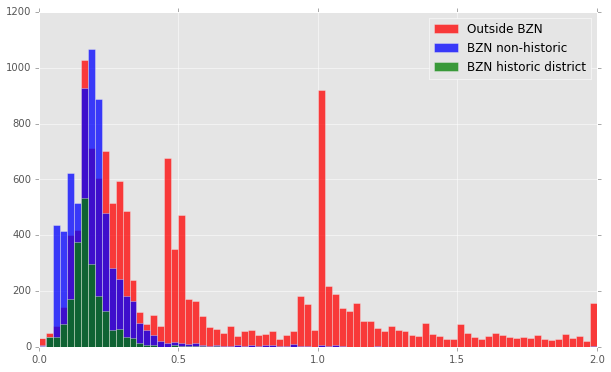

In [276]:
# Property size distribution

plotVar = 'SizeAcres'

county[plotVar].hist(bins=80, color='Red', alpha=0.75, range=(0,2), label='Outside BZN')
city_nonhist[plotVar].hist(bins=80, color='Blue' , alpha=0.75, range=(0,2), label='BZN non-historic')
city_historic[plotVar].hist(bins=80, color='Green', alpha=0.75, range=(0,2), label='BZN historic district')

pyplot.legend(loc='upper right')

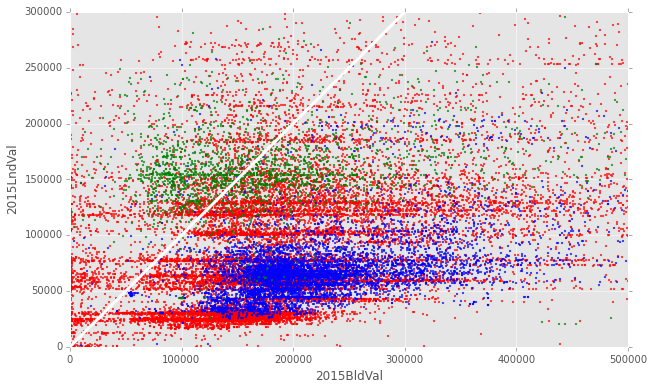

In [277]:
# Land val versus building value

ax = county.plot(kind='scatter', x='2015BldVal', y='2015LndVal',
        alpha=0.75, s=3, color='Red')
city_nonhist.plot(kind='scatter', x='2015BldVal', y='2015LndVal',
        alpha=0.75, s=3, color='Blue', ax=ax)
city_historic.plot(kind='scatter', x='2015BldVal', y='2015LndVal',
        alpha=0.75, s=3, color='Green', ax=ax)

ax.set_xlim([0,500000])
ax.set_ylim([0,300000])

# Land val = bulding val line
plt.plot(line, line, linewidth=3.0, color='White')

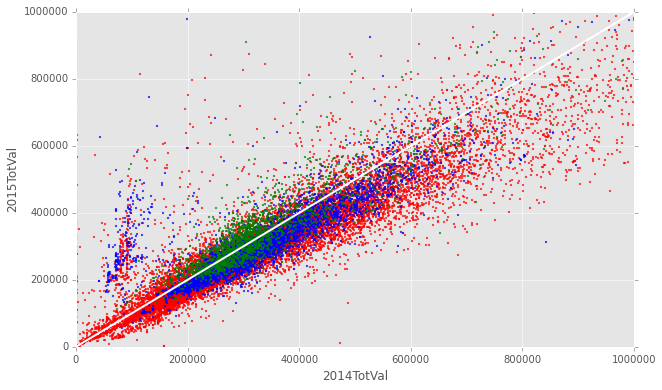

In [278]:
ax = county.plot(kind='scatter', x='2014TotVal', y='2015TotVal',
        alpha=0.75, s=3, color='Red')
city_nonhist.plot(kind='scatter', x='2014TotVal', y='2015TotVal',
        alpha=0.75, s=3, color='Blue', ax=ax)
city_historic.plot(kind='scatter', x='2014TotVal', y='2015TotVal',
        alpha=0.75, s=3, color='Green', ax=ax)

ax.set_xlim([0,1000000])
ax.set_ylim([0,1000000])

# Change=0 line
plt.plot(line, line, linewidth=2.0, color='White')

# NOTE — is the cluster of above-line blues here largely new construction?

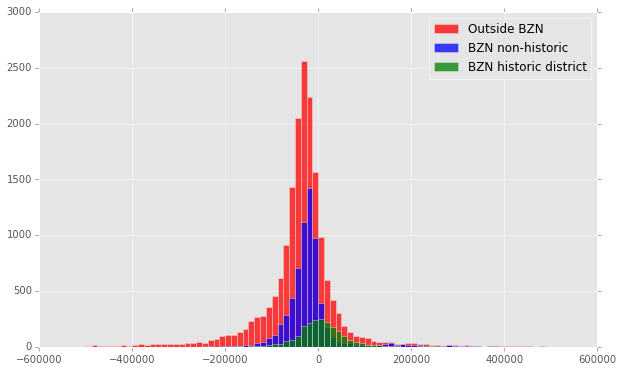

In [279]:
# Total value change distribution for residential properties

plotVar = 'TotChange'

county[plotVar].hist(bins=80, color='Red', alpha=0.75, range=(-500000,500000), label='Outside BZN')
city_nonhist[plotVar].hist(bins=80, color='Blue' , alpha=0.75, range=(-500000,500000), label='BZN non-historic')
city_historic[plotVar].hist(bins=80, color='Green', alpha=0.75, range=(-500000,500000), label='BZN historic district')

pyplot.legend(loc='upper right')

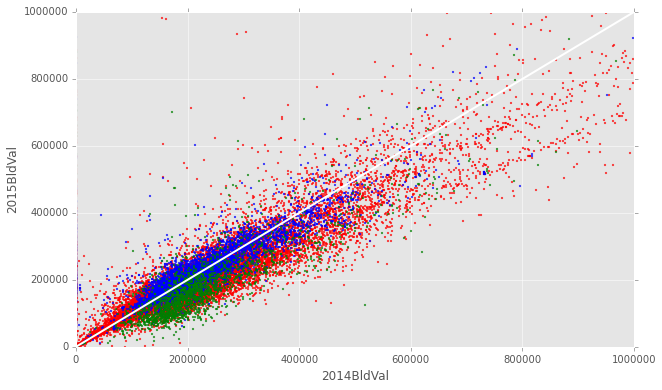

In [280]:
ax = county.plot(kind='scatter', x='2014BldVal', y='2015BldVal',
        alpha=0.75, s=3, color='Red')
city_nonhist.plot(kind='scatter', x='2014BldVal', y='2015BldVal',
        alpha=0.75, s=3, color='Blue', ax=ax)
city_historic.plot(kind='scatter', x='2014BldVal', y='2015BldVal',
        alpha=0.75, s=3, color='Green', ax=ax)

ax.set_xlim([0,1000000])
ax.set_ylim([0,1000000])

# Change=0 line
plt.plot(line, line, linewidth=2.0, color='White')

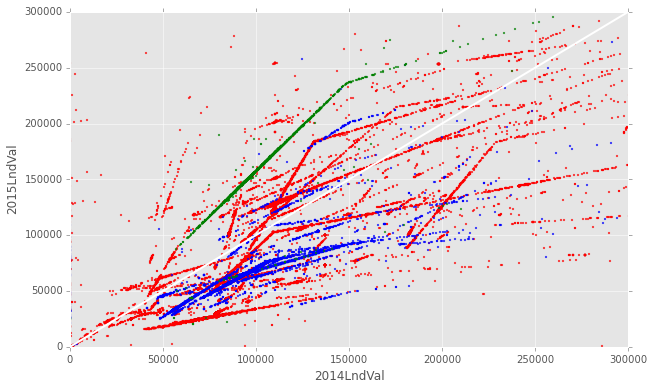

In [281]:
ax = county.plot(kind='scatter', x='2014LndVal', y='2015LndVal',
        alpha=0.75, s=3, color='Red')
city_nonhist.plot(kind='scatter', x='2014LndVal', y='2015LndVal',
        alpha=0.75, s=3, color='Blue', ax=ax)
city_historic.plot(kind='scatter', x='2014LndVal', y='2015LndVal',
        alpha=0.75, s=3, color='Green', ax=ax)

ax.set_xlim([0,300000])
ax.set_ylim([0,300000])

# Change=0 line
plt.plot(line, line, linewidth=2.0, color='White')

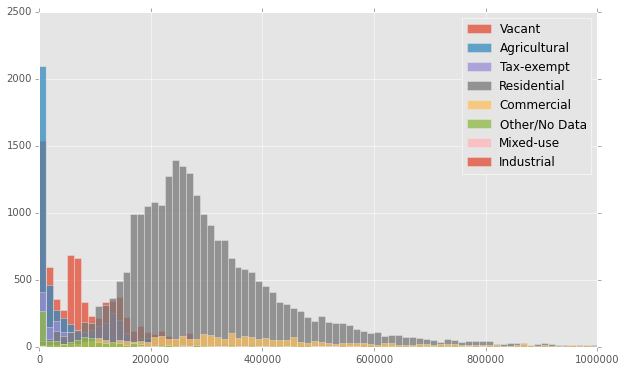

In [282]:
# Distribution of all properties by propcat

plotList = df['PropCat'].unique()
# plotList = ['Residential','Commercial','Tax-exempt']

for category in plotList:
    df['2015TotVal'][df['PropCat'] == category].hist(bins=80,
                                                     range=(0,1000000),
                                                     alpha=0.75,
                                                     label=category)

plt.legend(loc='upper right')

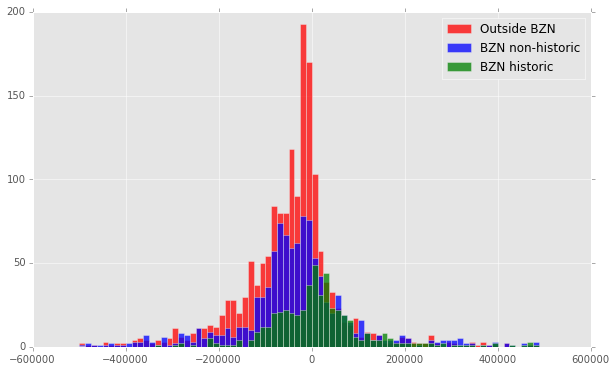

In [283]:
# Change distribution for commercial properties

plotVar = 'TotChange'

county_bus = df[df['PropCat'] == 'Commercial'][df['inbzn'] == False]
city_bus = df[df['PropCat'] == 'Commercial'][(df['inbzn'] == True) & (df['inncod'] == False)]
city_historic_bus = df[df['PropCat'] == 'Commercial'][df['inncod'] == True]

county_bus[plotVar].hist(bins=80, color='Red', alpha=0.75, range=(-500000,500000), label='Outside BZN')
city_bus[plotVar].hist(bins=80, color='Blue' , alpha=0.75, range=(-500000,500000), label='BZN non-historic')
city_historic_bus[plotVar].hist(bins=80, color='Green' , alpha=0.75, range=(-500000,500000), label='BZN historic')

pyplot.legend(loc='upper right')

In [284]:
# Print out data for a specific owner
df[df['ownername'] == 'BLACK BULL SUB PARKS']

,Unnamed: 0,parcelid,2015PropID,assessment,subdivisio,addresslin,addressl_1,citystatez,propaccess,levydistri,...,inncod,TotChange,LndChange,BldChange,TotPerCh,LndPerCh,BldPerCh,TotValPSF,LndValPSF,BldValPSF
27090,27090,06079807103010007,620252,00RGG58839,BLACK BULL SUB,NaN,NaN,NaN,NaN,06-036304-27 04,...,False,"-3,309,324.00","-3,309,324.00",nan,-0.63,-0.63,nan,3.16,3.16,nan
